In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

import bartz
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from bart_playground import *
from stochtree import BARTModel
import time

## Concrete Compressive Strength Data

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
concrete = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete.data.features 
y = concrete.data.targets 

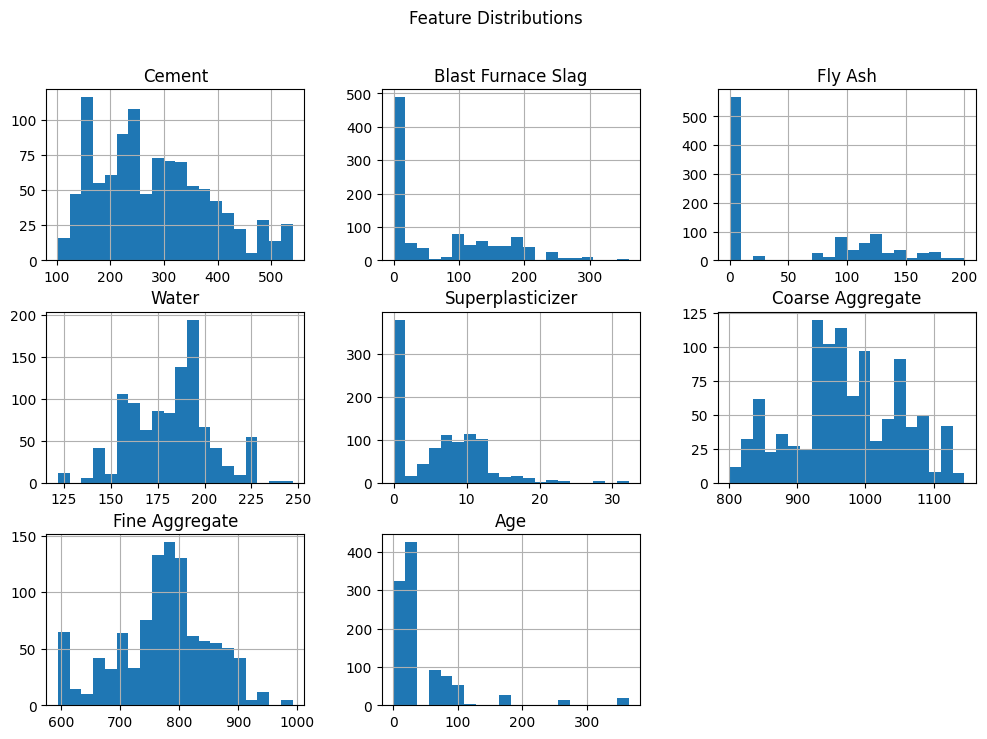

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

X.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

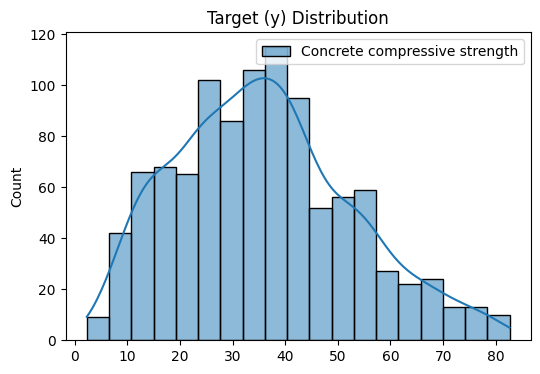

In [4]:
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True)
plt.title("Target (y) Distribution")
plt.show()

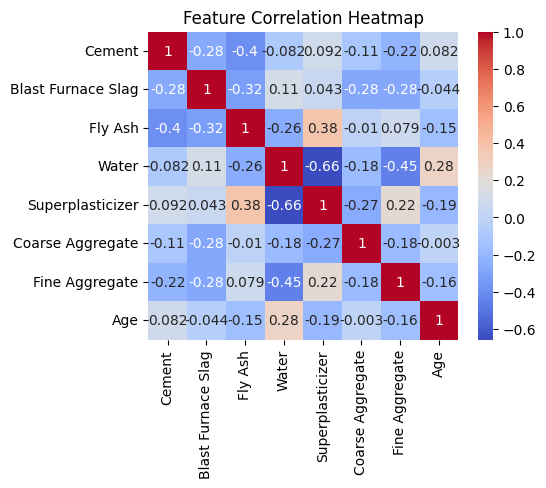

In [5]:
plt.figure(figsize=(5, 4))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
X = X.values.astype(float)
y = np.array(y).reshape(-1)

In [7]:
ndpost=1000
nskip=1000
n_trees=5

In [8]:
import comparison
import pandas as pd

rhat_df = comparison.gelman_rubin_r_compare(X, y, n_runs=10, n_chains=4, ndpost=ndpost, nskip=nskip, n_trees=n_trees, n_jobs=-2)
mean_row = pd.DataFrame([rhat_df.mean()], index=["mean"])
std_row = pd.DataFrame([rhat_df.std()], index=["std"])
rhat_df_with_stats = pd.concat([rhat_df, mean_row, std_row])
print("Gelman-Rubin R̂ comparison matrix:")
print(rhat_df_with_stats)

Gelman-Rubin R̂ comparison matrix:
      MultiBART_Rhat_Sigma2  DefaultBART_Rhat_Sigma2  MultiBART_Rhat_RMSE  \
0                  1.807784                 1.288219             1.707011   
1                  1.219413                 1.646902             1.437296   
2                  1.781293                 1.595343             2.028022   
3                  1.398492                 1.491027             1.872025   
4                  2.199228                 1.546828             2.258198   
5                  1.405617                 1.772920             1.546605   
6                  1.313790                 1.429634             1.074604   
7                  1.401098                 1.243978             1.425140   
8                  1.427253                 1.458184             1.310279   
9                  1.425297                 1.733009             1.349811   
mean               1.537926                 1.520604             1.600899   
std                0.298452              

In [9]:
rhat_df.to_csv("results/real4_Concrete_rhat.csv", index=False)

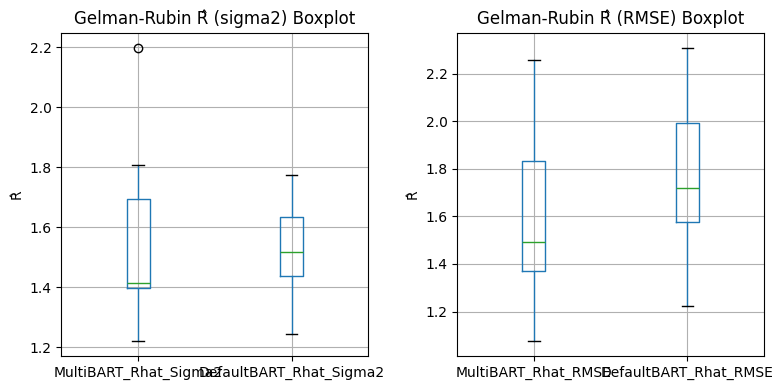

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# sigma2 boxplot
rhat_df[["MultiBART_Rhat_Sigma2", "DefaultBART_Rhat_Sigma2"]].boxplot(ax=axes[0])
axes[0].set_title("Gelman-Rubin R̂ (sigma2) Boxplot")
axes[0].set_ylabel("R̂")

# rmse boxplot
rhat_df[["MultiBART_Rhat_RMSE", "DefaultBART_Rhat_RMSE"]].boxplot(ax=axes[1])
axes[1].set_title("Gelman-Rubin R̂ (RMSE) Boxplot")
axes[1].set_ylabel("R̂")

plt.tight_layout()
plt.show()

INFO:2025-10-08 01:05:34,241:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-08 01:05:34,685:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-08 01:05:35,557:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to op

test_mse:
      bart_mtmh       bart        btz         rf        xgb
0     33.890475  29.950452  38.524847  34.837516  41.561827
1     33.619662  42.996506  42.731375  33.746389  45.756124
2     32.793120  31.053400  45.963950  32.251974  40.926021
3     32.396199  31.787407  35.071015  32.528139  47.536870
4     30.140064  30.853070  41.128213  31.875460  44.884516
5     29.710382  30.745437  35.899336  39.986682  43.646445
6     24.223028  36.281948  42.301158  31.833036  51.642903
7     28.190224  31.460141  39.834527  32.294385  39.502826
8     32.382449  38.515360  36.980556  36.705699  47.876197
9     32.453612  30.954773  34.638706  34.487658  41.654453
mean  30.979922  33.459849  39.307368  34.054694  44.498818
std    2.993085   4.343728   3.741275   2.613540   3.779648



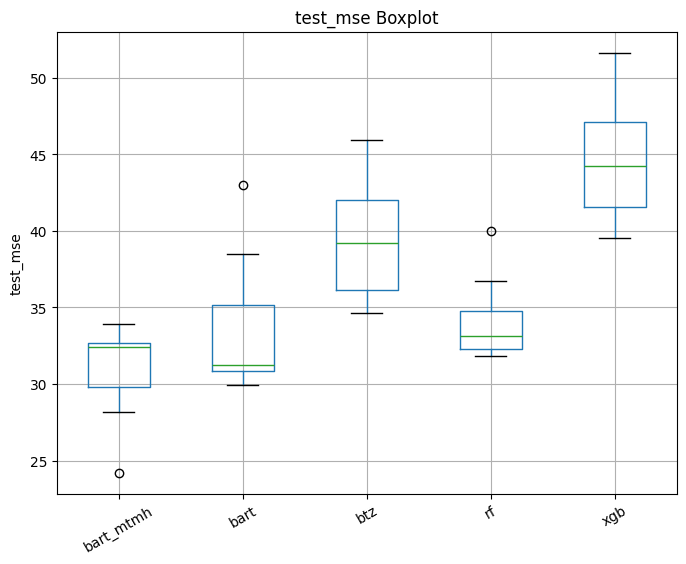

train_mse:
      bart_mtmh       bart        btz        rf        xgb
0     18.779029  22.110561  32.330240  7.899807  27.826977
1     18.690299  20.968191  31.893093  9.540558  27.281042
2     19.174494  22.759374  31.473332  8.967245  27.385614
3     19.763237  21.670242  25.480823  8.632874  27.392154
4     20.053697  22.858963  24.981433  8.226611  26.734088
5     17.356340  17.445811  23.366624  8.239656  26.054858
6     17.530771  16.841916  30.237709  8.040509  28.022863
7     19.660112  22.908780  27.125463  8.707739  29.123730
8     18.716966  21.166385  27.314089  6.396958  27.281676
9     19.470273  21.043183  26.631146  7.658348  28.468529
mean  18.919522  20.977341  28.083395  8.231031  27.557153
std    0.906795   2.155729   3.178822  0.848757   0.863942



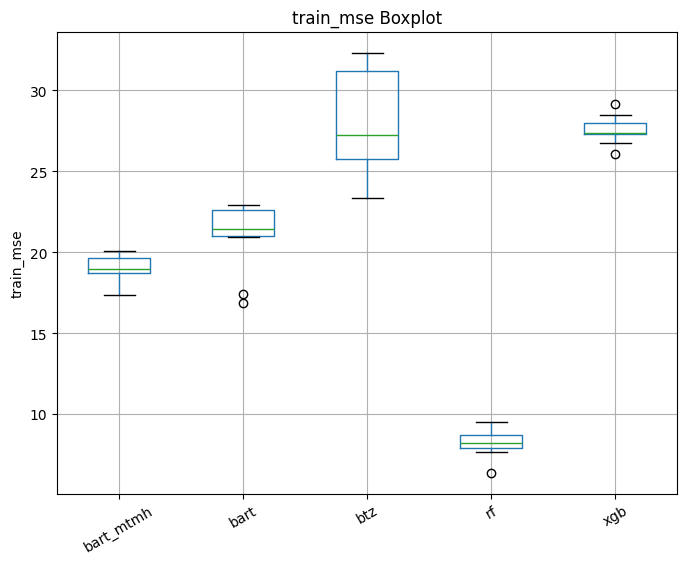

pi_length:
      bart_mtmh       bart        btz
0     19.647136  21.239740  32.318138
1     18.861506  19.725228  30.978346
2     18.722516  20.606718  28.328154
3     19.420235  21.337075  25.015789
4     19.546846  21.085473  27.855274
5     18.508936  19.785425  25.817005
6     19.053324  19.130959  30.513964
7     19.677774  20.610950  27.996483
8     18.957580  21.133100  31.184338
9     19.330100  20.498042  27.914528
mean  19.172595  20.515271  28.792200
std    0.409178   0.745210   2.392302



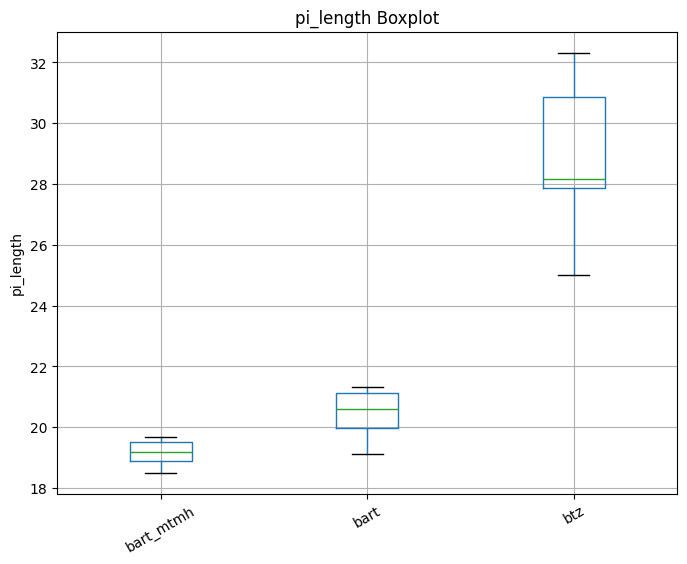

coverage:
      bart_mtmh      bart       btz
0      0.910853  0.937984  0.992248
1      0.903101  0.887597  0.968992
2      0.914729  0.945736  0.957364
3      0.914729  0.953488  0.961240
4      0.937984  0.953488  0.957364
5      0.922481  0.926357  0.965116
6      0.945736  0.899225  0.980620
7      0.930233  0.937984  0.972868
8      0.887597  0.918605  0.976744
9      0.914729  0.903101  0.980620
mean   0.918217  0.926357  0.971318
std    0.016890  0.023470  0.011440



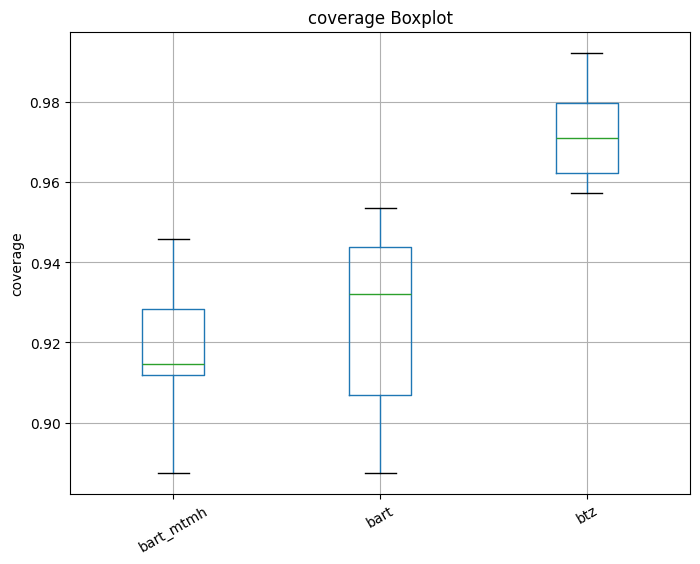

train_time:
      bart_mtmh      bart        btz        rf       xgb
0      8.522686  1.721439   9.538980  0.023124  0.040706
1      7.667792  1.572364   9.647981  0.022485  0.043324
2      9.543883  1.759229   9.859893  0.032034  0.053429
3      7.293510  1.986620   9.606001  0.032031  0.055463
4      6.759009  1.015323   9.925077  0.025826  0.041266
5      8.759056  2.474453   9.709064  0.031112  0.056939
6      7.345884  1.732284  10.139747  0.022897  0.065875
7      7.915538  1.354622   9.318244  0.030708  0.056666
8      6.513819  1.080900   9.434196  0.020582  0.042302
9      6.773798  1.170357  10.381063  0.030241  0.053549
mean   7.709498  1.586759   9.756025  0.027104  0.050952
std    0.982394  0.450539   0.325918  0.004552  0.008539



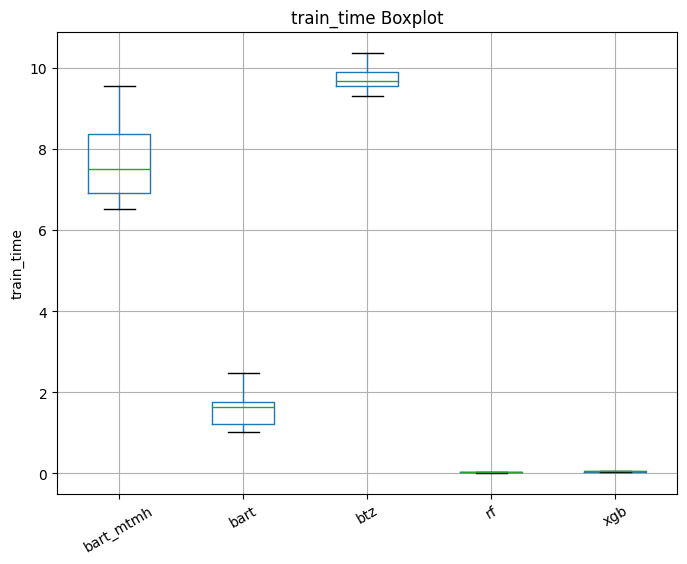

In [11]:
import matplotlib.pyplot as plt
import comparison
import pandas as pd

mse_results = comparison.bart_mse_comparison(X, y, n_runs=10, n_skip=nskip, n_post=ndpost, n_trees=n_trees, n_jobs=-2)
for k, v in mse_results.items():
    mean_row = pd.DataFrame([v.mean()], index=["mean"])
    std_row = pd.DataFrame([v.std()], index=["std"])
    v_with_stats = pd.concat([v, mean_row, std_row])
    print(f"{k}:\n{v_with_stats}\n")
    
    plt.figure(figsize=(8, 6))
    v.boxplot()
    plt.title(f"{k} Boxplot")
    plt.ylabel(k)
    plt.xticks(rotation=30)
    plt.show()

In [12]:
for k, v in mse_results.items():
    csv_name = f"results/real4_Concrete_{k}.csv"
    v.to_csv(csv_name, index=False)

## Multi-tries

In [13]:
from multi_tries import multi_tries_performance
import pandas as pd

csv_path = "results/real4_Concrete_tries.csv"
existing_df = None

if os.path.exists(csv_path):
    existing_df = pd.read_csv(csv_path)

df = multi_tries_performance(
    X, y,
    multi_tries_list=[1, 5, 10, 50, 100],
    n_runs=10, n_chains=4,
    ndpost=ndpost, nskip=nskip, n_trees=n_trees, n_jobs=-2
)

if existing_df is not None:
    df = pd.concat([existing_df, df], ignore_index=True)
    df = df.sort_values(by='multi_tries', ascending=True).reset_index(drop=True)

df.to_csv("results/real4_Concrete_tries.csv", index=False)

In [14]:
print(df)

   multi_tries  Rhat_Sigma2  Rhat_RMSE   Test_MSE  Coverage  Train_Time
0            1     1.595893   2.110734  33.342622  0.932946    3.642690
1            5     1.473576   1.812340  32.694552  0.916279    5.211636
2           10     1.537926   1.600899  30.911719  0.918992    7.025897
3           50     1.562151   1.831399  28.334820  0.917829   22.681216
4          100     1.581513   1.514590  28.492439  0.918605   38.760838
